In [1]:
import requests as rq
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np                                        
import matplotlib.pyplot as plt

In [2]:
headers = ({'User-Agent' : 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:102.0) Gecko/20100101 Firefox/102.0'})
url = 'https://df.olx.com.br/imoveis/aluguel'
response = rq.get(url,  headers=headers)
content = response.content

site = bs(content, 'html.parser')

In [3]:
l = site.find('div', class_='sc-EHOje gpDieb')

paginas = []


for item in l.find_all('a'):
  paginas.append(item['href'])
paginas

['https://df.olx.com.br/imoveis/aluguel?o=2',
 'https://df.olx.com.br/imoveis/aluguel?o=3',
 'https://df.olx.com.br/imoveis/aluguel?o=4',
 'https://df.olx.com.br/imoveis/aluguel?o=5',
 'https://df.olx.com.br/imoveis/aluguel?o=6',
 'https://df.olx.com.br/imoveis/aluguel?o=7',
 'https://df.olx.com.br/imoveis/aluguel?o=8',
 'https://df.olx.com.br/imoveis/aluguel?o=9',
 'https://df.olx.com.br/imoveis/aluguel?o=10',
 'https://df.olx.com.br/imoveis/aluguel?o=2']

In [4]:
titulos = []
links = []
valores = []


itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('a'):
    links.append(item['href'])
  else:
    links.append('') 

In [5]:
itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('a'):
    titulos.append(item['title'])
  else:
    titulos.append('')

In [6]:
valores = []


itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('div', class_='sc-1kn4z61-1 dGMPPn'):
    valores.append(item.text)
  else:
    valores.append('') 

In [7]:
localizacao = []


itens = site.find('ul', id='ad-list')
for pagina in paginas:

  for item in itens.find_all('span', class_='sc-1c3ysll-1 cLQXSQ sc-ifAKCX fCbscF'):
    localizacao.append(item['title'])
  else:
    localizacao.append('') 

In [8]:
data = []

itens = site.find('ul', id='ad-list')
for pagina in paginas:


  
    for item in itens.find_all('span', class_='sc-11h4wdr-0 javKJU sc-ifAKCX fCbscF'):
      data.append(item['aria-label'])
    else:
      data.append('')  

In [9]:
cond = []
quartos = []
metros = []

itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('span', class_='sc-1ftm7qz-0 doofcG sc-ifAKCX fCbscF'):
      if 'Condomínio' in str(item.text):
        cond.append(item.text)  
      elif '' in str(item.text):
        cond.append('')

In [10]:
cond = []
itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('span', class_='sc-1ftm7qz-0 doofcG sc-ifAKCX fCbscF'):
      if 'Condomínio' in str(item.text):
        cond.append(item.text)
      else:
        cond.append('')  

In [11]:
quartos = []
itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('span', class_='sc-1ftm7qz-0 doofcG sc-ifAKCX fCbscF'):
      if 'quartos' in str(item.text):
        quartos.append(item.text)  
      elif '' in str(item.text):
        quartos.append('')

In [12]:
metros = []
itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('span', class_='sc-1ftm7qz-0 doofcG sc-ifAKCX fCbscF'):
      if 'm²' in str(item.text):
        metros.append(item.text)
        
      else:
        metros.append('')  

In [21]:
metros = []
quartos = []
cond = []

itens = site.find('ul', id='ad-list')
for pagina in paginas:
  for item in itens.find_all('span', class_='sc-1ftm7qz-0 doofcG sc-ifAKCX fCbscF'):
      if 'm²' in str(item.text):
        metros.append(item.text)
      elif 'quartos' in str(item.text):
        quartos.append(item.text)
      elif 'Condomínio' in str(item.text):
        cond.append(item.text)
          
     

     

In [14]:
len(valores)

510

In [22]:
df = pd.DataFrame(list(zip(titulos, links, valores, localizacao, data, metros, quartos, cond,)),
                  columns=['titulo', 'link', 'aluguel', 'localização', 'data de postagem', 'metragem', 'quartos', 'condominio' ])

In [23]:
df

,titulo,link,aluguel,localização,data de postagem,metragem,quartos,condominio
0,"Alugo apartamento 1 rua acima da prefeitura,em...",https://df.olx.com.br/distrito-federal-e-regia...,R$ 1.100,"Luziânia, Centro - DDD 61","Anúncio publicado em: Hoje, 19:27.",70m²,2 quartos,Condomínio: R$ 0
1,Apart totalmente reformado para aluguel tem 62...,https://df.olx.com.br/distrito-federal-e-regia...,R$ 1.500,"Brasília, Sobradinho - DDD 61","Anúncio publicado em: Hoje, 19:24.",62m²,2 quartos,Condomínio: R$ 0
2,"Flat com 1 dormitório, 30 m² - venda por R$ 21...",https://df.olx.com.br/distrito-federal-e-regia...,R$ 1.800,"Brasília, Sul (Águas Claras) - DDD 61","Anúncio publicado em: Hoje, 19:22.",30m²,2 quartos,Condomínio: R$ 0
3,Aluguel casa Valparaíso -Go,https://df.olx.com.br/distrito-federal-e-regia...,R$ 800,"Valparaíso de Goiás, Cidade Jardins - Etapa B ...","Anúncio publicado em: Hoje, 19:22.",700m²,3 quartos,Condomínio: R$ 0
4,Gama. Setor Sul. Q. 9,https://df.olx.com.br/distrito-federal-e-regia...,,"Brasília, Setor Sul (Gama) - DDD 61","Anúncio publicado em: Hoje, 19:22.",30m²,4 quartos,Condomínio: R$ 0
...,...,...,...,...,...,...,...,...
295,"Apartamento com 2 dormitórios para alugar, 70 ...",https://df.olx.com.br/distrito-federal-e-regia...,R$ 1.200,"Brasília, Riacho Fundo II - DDD 61","Anúncio publicado em: Hoje, 17:52.",26m²,2 quartos,Condomínio: R$ 409
296,"Aluga-se Casa para Eventos, 1130 m² por R$ 19....",https://df.olx.com.br/distrito-federal-e-regia...,R$ 19.000,"Brasília, Park Way - DDD 61","Anúncio publicado em: Hoje, 17:52.",92m²,2 quartos,Condomínio: R$ 590
297,"Locação Nova Kit Flat - Enxoval Completo, Serv...",https://df.olx.com.br/distrito-federal-e-regia...,R$ 3.100,"Brasília, Setor Sudoeste - DDD 61","Anúncio publicado em: Hoje, 17:49.",75m²,2 quartos,Condomínio: R$ 950
298,Isla life style - apto 3 qtos nascente vista l...,https://df.olx.com.br/distrito-federal-e-regia...,R$ 4.250,"Brasília, Guará II - DDD 61","Anúncio publicado em: Hoje, 17:41.",73m²,3 quartos,Condomínio: R$ 651


In [28]:
df['aluguel'] = df['aluguel'].str.replace(r'\D', '')
df['condominio'] = df['condominio'].str.replace(r'\D', '')
df['metragem'] = df['metragem'].str.replace(r'\D', '')
df['quartos'] = df['quartos'].str.replace(r'\D', '')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [29]:
df['condominio'] = pd.to_numeric(df['condominio'])
df['metragem'] = pd.to_numeric(df['metragem'])
df['aluguel'] = pd.to_numeric(df['aluguel'])
df['quartos'] = pd.to_numeric(df['quartos'])


In [30]:
df['valor total'] = df['aluguel'] + df['condominio']

In [31]:
df.head(100)

,titulo,link,aluguel,localização,data de postagem,metragem,quartos,condominio,valor total
0,"Apartamento com 1 dormitório para alugar, 55 m...",https://df.olx.com.br/distrito-federal-e-regia...,1200.0,"Brasília, Areal (Águas Claras) - DDD 61","Anúncio publicado em: Hoje, 12:11.",NaN,NaN,NaN,NaN
1,Incrível apartamento 01 quarto mobiliado,https://df.olx.com.br/distrito-federal-e-regia...,1900.0,"Brasília, Sul (Águas Claras) - DDD 61","Anúncio publicado em: Hoje, 12:07.",55.0,NaN,NaN,NaN
2,Apartamento 02 quartos mobiliado,https://df.olx.com.br/distrito-federal-e-regia...,3500.0,"Brasília, Zona Industrial - DDD 61","Anúncio publicado em: Hoje, 12:06.",NaN,NaN,0.0,3500.0
3,Alugo apt de 2 quarto na QI 31 do guara II,https://df.olx.com.br/distrito-federal-e-regia...,1650.0,"Brasília, Guará II - DDD 61","Anúncio publicado em: Hoje, 12:04.",NaN,NaN,NaN,NaN
4,Apto TaguaLife Bloco F,https://df.olx.com.br/distrito-federal-e-regia...,1500.0,"Brasília, Taguatinga Sul (Taguatinga) - DDD 61","Anúncio publicado em: Hoje, 12:04.",46.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,"Kit / Sala SCLN 214, bloco D",https://df.olx.com.br/distrito-federal-e-regia...,900.0,"Brasília, Asa Norte - DDD 61","Anúncio publicado em: Hoje, 11:04.",NaN,NaN,530.0,1430.0
96,Aluguel de casa em Brasília DF,https://df.olx.com.br/distrito-federal-e-regia...,950.0,"Brasília, Guará II - DDD 61","Anúncio publicado em: Hoje, 11:02.",NaN,NaN,NaN,NaN
97,Lindo e totalmente REFORMADO apartamento. 2 V...,https://df.olx.com.br/distrito-federal-e-regia...,5050.0,"Brasília, Asa Norte - DDD 61","Anúncio publicado em: Hoje, 11:02.",NaN,3.0,NaN,NaN
98,Lago Sul - casa para alugar,https://df.olx.com.br/distrito-federal-e-regia...,55000.0,"Brasília, Asa Sul - DDD 61","Anúncio publicado em: Hoje, 11:00.",158.0,NaN,NaN,NaN


In [ ]:
cidades = df[['aluguel', 'condominio']].groupby('aluguel', 'condominio').sum()
cidades.head()

ValueError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titulo            510 non-null    object 
 1   link              510 non-null    object 
 2   aluguel           490 non-null    float64
 3   localização       510 non-null    object 
 4   data de postagem  510 non-null    object 
 5   metragem          109 non-null    float64
 6   quartos           109 non-null    float64
 7   condominio        144 non-null    float64
 8   valor total       138 non-null    float64
dtypes: float64(5), object(4)
memory usage: 36.0+ KB


In [32]:
group1 = df[['localização', 'valor total']]

In [33]:
group1 = group1.dropna()

In [34]:
len(group1)

112

In [35]:
l = group1.groupby('localização').median()
l.head()

,valor total
localização,
"Brasília, Areal (Águas Claras) - DDD 61",1200.0
"Brasília, Asa Norte - DDD 61",4500.0
"Brasília, Asa Sul - DDD 61",55000.0
"Brasília, Ceilândia Norte (Ceilândia) - DDD 61",1200.0
"Brasília, Ceilândia Sul (Ceilândia) - DDD 61",1200.0


In [ ]:
ll = group1.groupby('localização').mean()
l.head()

,valor total
localização,
"Brasília, Asa Norte - DDD 61",1640.0
"Brasília, Asa Sul - DDD 61",1233.0
"Brasília, Candangolândia - DDD 61",109.0
"Brasília, Ceilândia Norte (Ceilândia) - DDD 61",640.0
"Brasília, Ceilândia Sul (Ceilândia) - DDD 61",840.0


,valor total
localização,
"Brasília, Asa Norte - DDD 61",9
"Brasília, Asa Sul - DDD 61",3
"Brasília, Candangolândia - DDD 61",3
"Brasília, Ceilândia Norte (Ceilândia) - DDD 61",5
"Brasília, Ceilândia Sul (Ceilândia) - DDD 61",5
"Brasília, Guará II - DDD 61",6
"Brasília, Jardins Mangueiral (Jardim Botânico) - DDD 61",3
"Brasília, Norte (Águas Claras) - DDD 61",5
"Brasília, Riacho Fundo II - DDD 61",5


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


localização
Brasília, Asa Norte - DDD 61                                           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Asa Sul - DDD 61                                             [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Candangolândia - DDD 61                                      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Ceilândia Norte (Ceilândia) - DDD 61                         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Ceilândia Sul (Ceilândia) - DDD 61                           [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Guará II - DDD 61                                            [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Jardins Mangueiral (Jardim Botânico) - DDD 61                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Norte (Águas Claras) - DDD 61                                [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Brasília, Riacho Fundo II - DDD 61                                     [[AxesSubplot(0.125,0

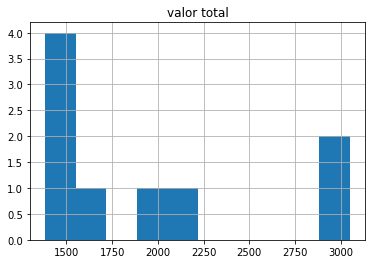

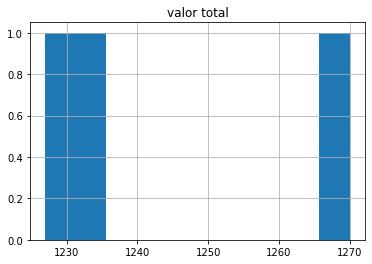

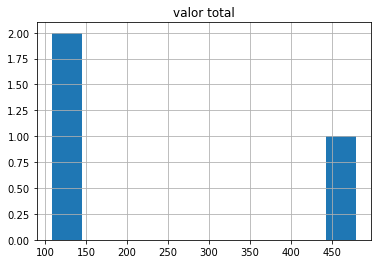

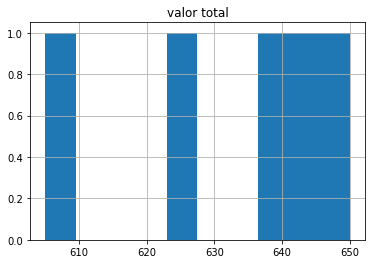

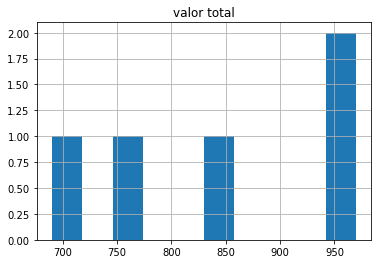

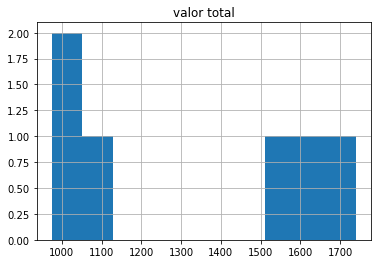

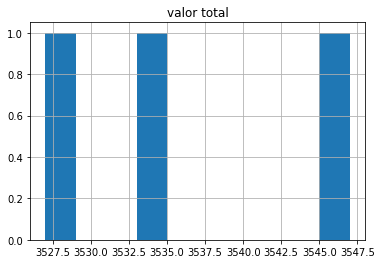

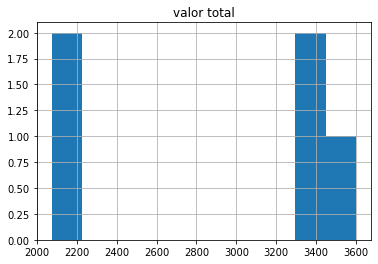

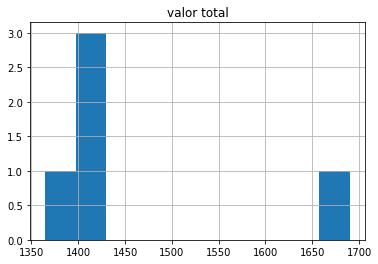

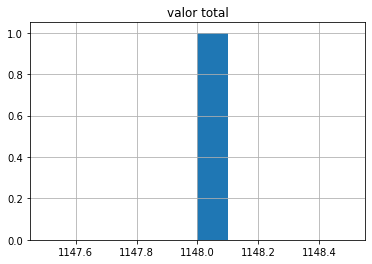

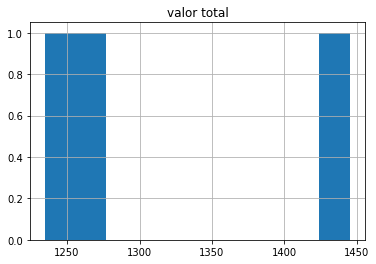

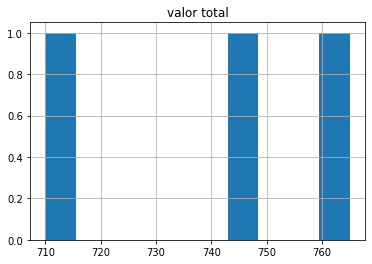

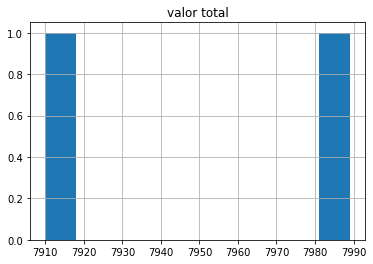

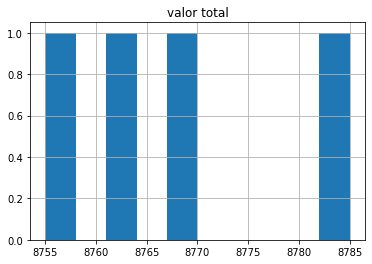

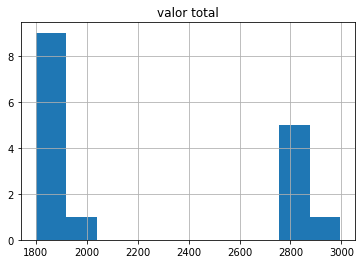

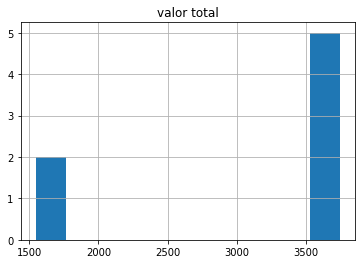

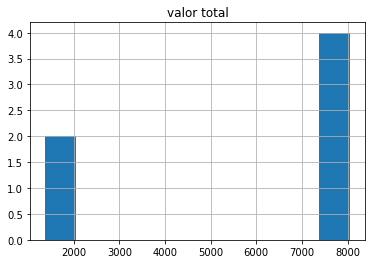

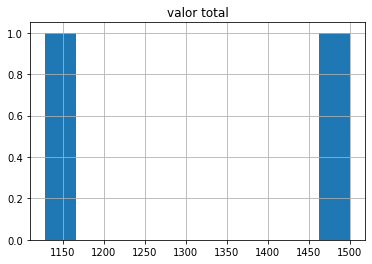

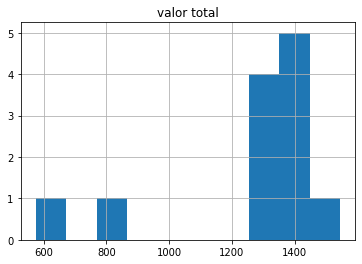

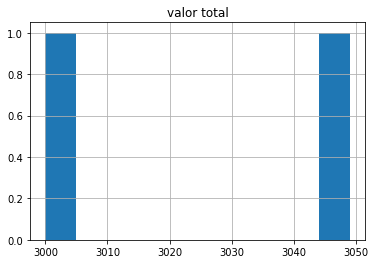

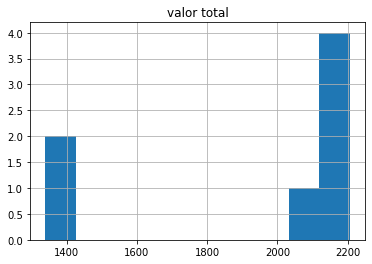

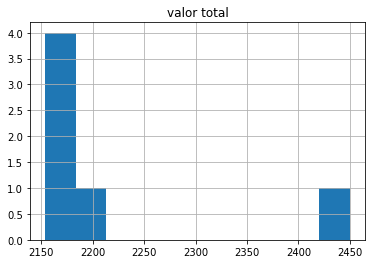

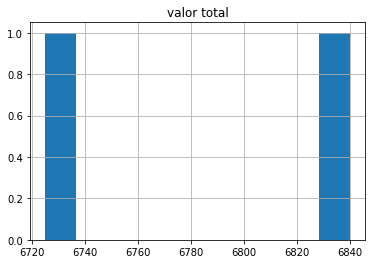

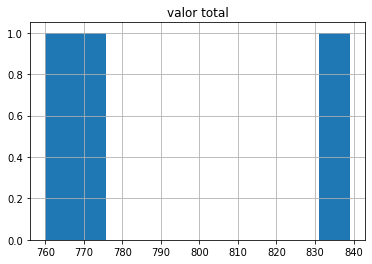

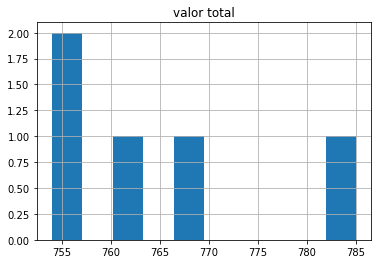

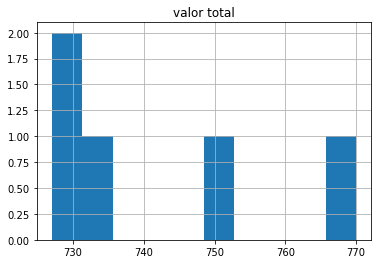

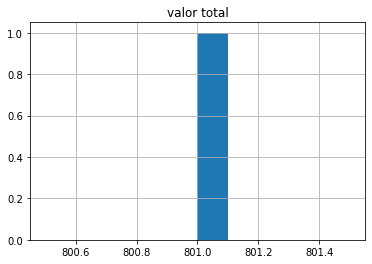

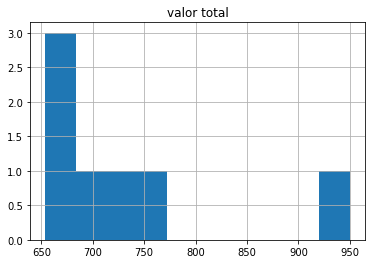

In [ ]:
group1.groupby('localização').hist()

In [ ]:
group1.groupby('localização').describe()

valor total               \
                                                         count         mean   
localização                                                                   
Brasília, Asa Norte - DDD 61                               9.0  1964.000000   
Brasília, Asa Sul - DDD 61                                 3.0  1243.333333   
Brasília, Candangolândia - DDD 61                          3.0   232.333333   
Brasília, Ceilândia Norte (Ceilândia) - DDD 61             5.0   633.400000   
Brasília, Ceilândia Sul (Ceilândia) - DDD 61               5.0   841.200000   
Brasília, Guará II - DDD 61                                6.0  1325.666667   
Brasília, Jardins Mangueiral (Jardim Botânico) ...         3.0  3535.666667   
Brasília, Norte (Águas Claras) - DDD 61                    5.0  2877.600000   
Brasília, Riacho Fundo II - DDD 61                         5.0  1454.000000   
Brasília, Samambaia Norte (Samambaia) - DDD 61             1.0  1148.000000   
Brasília, Samambaia Sul (Samambaia) - DDD 61               3.0  1312.666667   
Brasília, Santa Maria - DDD 61                             3.0   741.000000   
Brasília, Setor Habitacional Vicente Pires - Tr...         2.0  7949.500000   
Brasília, Setor Noroeste - DDD 61                          4.0  8767.750000   
Brasília, Setor Sudoeste - DDD 61                         16.0  2222.062500   
Brasília, Sobradinho - DDD 61                              7.0  3023.714286   
Brasília, Sul (Águas Claras) - DDD 61                      6.0  5821.500000   
Brasília, Taguatinga Centro (Taguatinga) - DDD 61          2.0  1314.500000   
Brasília, Taguatinga Norte (Taguatinga) - DDD 61          12.0  1263.750000   
Brasília, Taguatinga Norte - DDD 61                        2.0  3024.500000   
Brasília, Taguatinga Sul (Taguatinga) - DDD 61             7.0  1926.857143   
Brasília, Vila Planalto - DDD 61                           6.0  2212.500000   
Brasília, Zona Industrial (Guará) - DDD 61                 2.0  6782.500000   
Brasília, Área de Desenvolvimento Econômico (Ág...         3.0   791.333333   
Luziânia, Centro - DDD 61                                  5.0   765.000000   
Valparaíso de Goiás, Jardim Céu Azul - DDD 61              5.0   742.200000   
Valparaíso de Goiás, Parque Rio Branco - DDD 61            1.0   801.000000   
Valparaíso de Goiás, Ypiranga - DDD 61                     7.0   727.428571   

                                                                         \
                                                            std     min   
localização                                                               
Brasília, Asa Norte - DDD 61                         652.853927  1385.0   
Brasília, Asa Sul - DDD 61                            23.288051  1227.0   
Brasília, Candangolândia - DDD 61                    214.486208   108.0   
Brasília, Ceilândia Norte (Ceilândia) - DDD 61        18.036075   605.0   
Brasília, Ceilândia Sul (Ceilândia) - DDD 61         124.278719   690.0   
Brasília, Guará II - DDD 61                          340.669145   975.0   
Brasília, Jardins Mangueiral (Jardim Botânico) ...    10.263203  3527.0   
Brasília, Norte (Águas Claras) - DDD 61              735.355900  2075.0   
Brasília, Riacho Fundo II - DDD 61                   133.107100  1365.0   
Brasília, Samambaia Norte (Samambaia) - DDD 61              NaN  1148.0   
Brasília, Samambaia Sul (Samambaia) - DDD 61         115.179570  1235.0   
Brasília, Santa Maria - DDD 61                        28.160256   710.0   
Brasília, Setor Habitacional Vicente Pires - Tr...    55.861436  7910.0   
Brasília, Setor Noroeste - DDD 61                     12.841988  8755.0   
Brasília, Setor Sudoeste - DDD 61                    504.496775  1800.0   
Brasília, Sobradinho - DDD 61                        992.695105  1548.0   
Brasília, Sul (Águas Claras) - DDD 61               3423.021399  1380.0   
Brasília, Taguatinga Centro (Taguatinga) - DDD 61    262.336616  1129.0   
Brasília, Taguatinga Norte